# Newton Fractals
---
This is a notebook about Newton fractals.

In [1]:
#https://github.com/rrgalvan/python-mnii/blob/master/1-ceros-de-funciones/Newton-Fractal.ipynb

import matplotlib.pyplot as plt
%matplotlib inline



In [31]:
# Newton fractals
# Based on FB - 201003291, http://code.activestate.com/
from PIL import Image
imgx = 1000
imgy = 1000
image = Image.new("RGB", (imgx, imgy))

# Complex window
xa = -1.0
xb = 1.0
ya = -1.0
yb = 1.0

maxIt = 20 # max iterations allowed
h = 1e-8 # step size for numerical derivative
eps = 1e-5 # max error allowed

# put any complex function here to generate a fractal for it!
def f(z):
    return z * z * z - 1.0

def iterationColorize(iterations):
    return i % 4 * 64, i % 8 * 32, i % 16 * 16 # red, green, blue

def rootColorize(z):
    root1 = complex(1,0)
    root2 = complex(-0.5,3**0.5)
    root3 = complex(-0.5,-3**0.5)
    
    dist1 = abs(root1-z)
    dist2 = abs(root2-z)
    dist3 = abs(root3-z)
    
    if dist1 < dist2 and dist1 < dist3:
        return 255, 0, 0
    elif dist2 < dist1 and dist2 < dist3:
        return 0, 255, 0
    elif dist3 < dist1 and dist3 < dist2:
        return 0, 0, 255
    
    return 0, 0, 0

# draw the fractal
print("Running complex newton iterations from %i x %i pixels" % (imgx,imgy), end="... ")
for y in range(imgy):
    zy = y * (yb - ya) / (imgy - 1) + ya
    for x in range(imgx):
        zx = x * (xb - xa) / (imgx - 1) + xa
        z = complex(zx, zy)
        for i in range(maxIt):
            # approximation of complex numerical derivative
            dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
            z0 = z - f(z) / dz # Newton iteration
            if abs(z0 - z) < eps: # stop when close enough to any root
                break
            z = z0
        #r, g, b = iterationColorize(i)
        r, g, b = rootColorize(z)
        image.putpixel((x, y), (r, g, b))
print ("¡bien!")

Running complex newton iterations from 1000 x 1000 pixels... ¡bien!


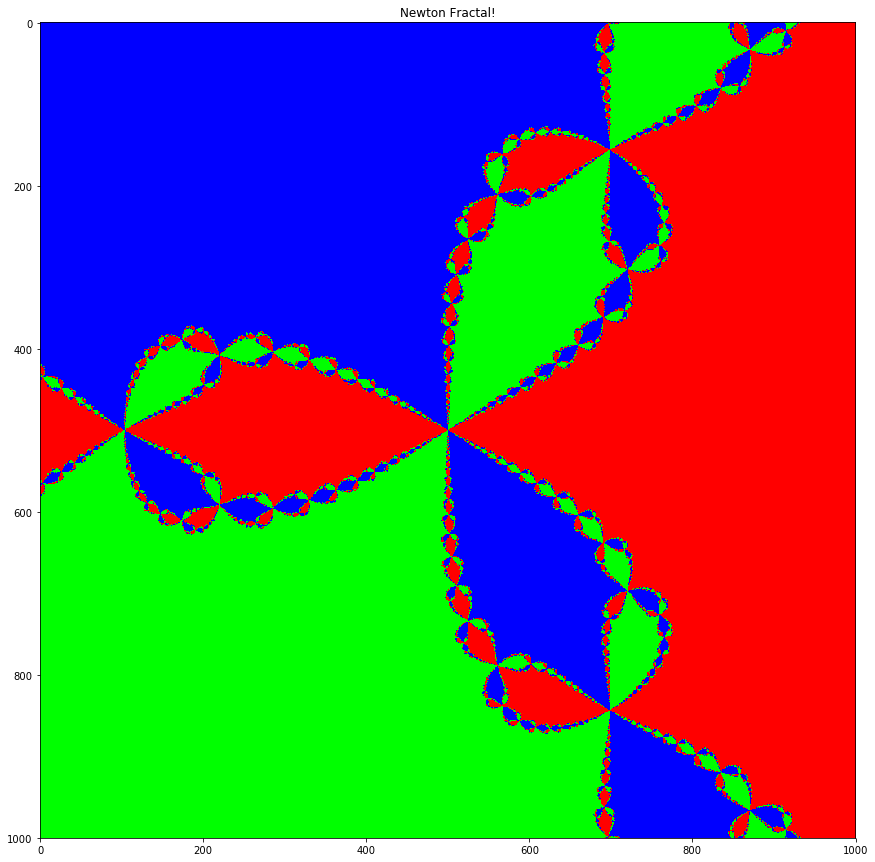

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.title("Newton Fractal!")